# Project 1: Coyote or Dog

## Team:
- Chris Navoczynski - Importing data/Training the Model
- Peter Torres - Refinements to prevent overfitting
- Mona Mohamed - Model validation & evaluation


**Import Statements & Locate the .zip folder of data.**

In [1]:
import os
import zipfile
from google.colab import drive
drive.mount('/content/drive/')

local_zip = '/content/drive/My Drive/AD470-MPC-Group1-SP2022/Project_1/data/dogs_and_coyotes.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


Mounted at /content/drive/


**Retreive the Zip File cotaining all folders of dogs and coyotes.**

In [2]:
!unzip -u "/content/drive/My Drive/AD470-MPC-Group1-SP2022/Project_1/data/dogs_and_coyotes.zip" -d "/content/drive/My Drive/AD470-MPC-Group1-SP2022/Project_1/data/"

Archive:  /content/drive/My Drive/AD470-MPC-Group1-SP2022/Project_1/data/dogs_and_coyotes.zip


**Define the 4 subsets for Training and Validation.** <br>
**These directories will include:**
- dogs train
- coyotes train
- dogs validate
- coyotes validate


In [4]:
home_directory = '/content/drive/My Drive/AD470-MPC-Group1-SP2022/Project_1/data/dogs_and_coyotes'
train_direct = os.path.join(home_directory, 'train')
validate_direct = os.path.join(home_directory, 'validation')

# Subset with dog pics for training
dogs_train = os.path.join(train_direct, 'dogs')

# Subset with coyote pics for training
coyotes_train = os.path.join(train_direct, 'coyotes')

# Subset with dog pics for validation
dogs_validate = os.path.join(validate_direct, 'dogs')

# Subset with coyote pics for validation
coyotes_validate = os.path.join(validate_direct, 'coyotes') 


**Confirm File Names in the `train` and `validate` subset directories.**<br>
**(First 5 pics in each subset viewed)**

In [5]:
dog_train_file = os.listdir(dogs_train)
coyote_train_file = os.listdir(coyotes_train)
print(dog_train_file[:5])
print(coyote_train_file[:5])

dog_validate_file = os.listdir(dogs_validate)
coyote_validate_file = os.listdir(coyotes_validate)
print(dog_validate_file[:5])
print(coyote_validate_file[:5])

['dog.1.jpg', 'dog.0.jpg', 'dog.100.jpg', 'dog.10.jpg', 'dog.101.jpg']
['image150.jpg', 'image19.jpg', 'image124.jpg', 'image197.jpg', 'image58.jpg']
['dog.2031.jpg', 'dog.2005.jpg', 'dog.2015.jpg', 'dog.2011.jpg', 'dog.2012.jpg']
['image1069.jpg', 'image1050.jpg', 'image1005.jpg', 'image1162.jpg', 'image1029.jpg']


**Confirm how many pics are located in all 4 subset directories.**

In [6]:
from posix import listdir
print('Total dog training pics: = ', len(os.listdir(dogs_train)))
print('Total coyote training pics: = ', len(os.listdir(coyotes_train)))
print('Total dog validation pics: = ', len(os.listdir(dogs_validate)))
print('Total coyote validation pics: = ', len(os.listdir(coyotes_validate)))

Total dog training pics: =  539
Total coyote training pics: =  538
Total dog validation pics: =  387
Total coyote validation pics: =  386


**Sample datasets of coyotes and dogs** <br>


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image

# 5x5 Configuration Graph parameters
numRows = 5
numCols = 5

# Index iteration
pic_index = 0



**Return a batch of 10 dogs and 10 coyotes.
Each time run, returns a new batch**

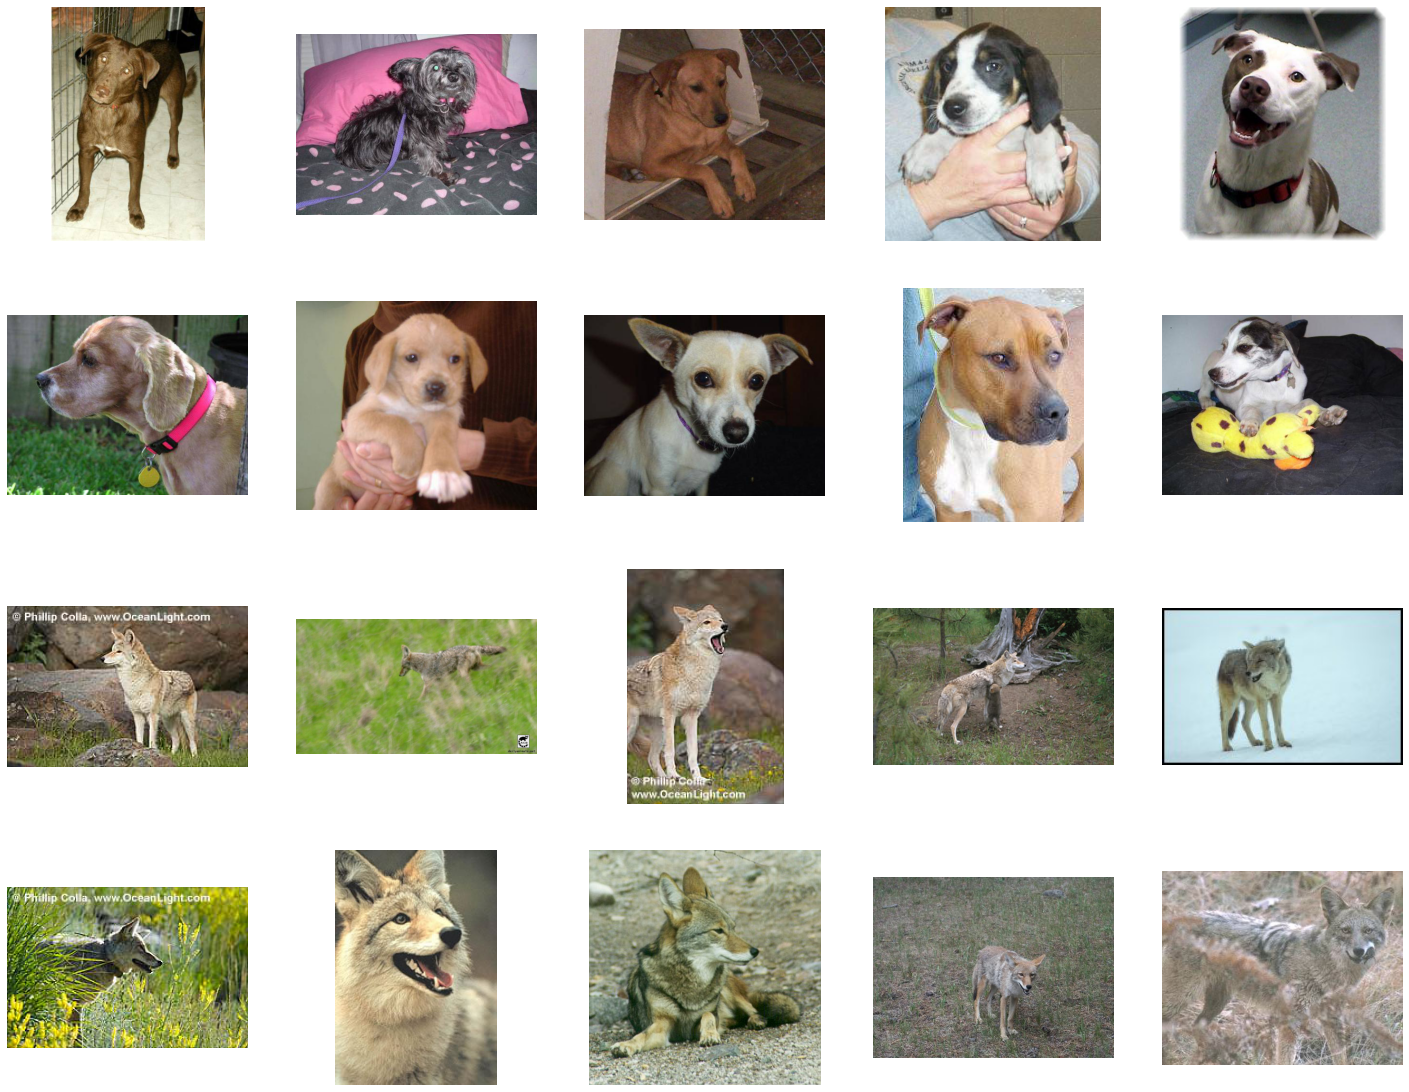

In [9]:
#Sets size to 5x5 pics
figuration = plt.gcf()
figuration.set_size_inches(numCols * 5, numRows * 5)

pic_index += 10
toNextDog = [os.path.join(dogs_train, picsFile) 
              for picsFile in dog_train_file[pic_index-10:pic_index]]
toNextCoyote = [os.path.join(coyotes_train, picsFile)
                for picsFile in coyote_train_file[pic_index-10:pic_index]]

for i, img_path in enumerate(toNextDog + toNextCoyote):
  # Show subplot starting at 1
  splot = plt.subplot(numRows, numCols, i + 1)
  splot.axis('Off')

  img = image.imread(img_path)
  plt.imshow(img)

plt.show()

**Create a Convent to Update the Accuracy of photos**

In [10]:
# Import Statements
from tensorflow.keras import layers
from tensorflow.keras import Model

In [11]:
# Create input map for the image's pixels based on the 3 color channels of R, G, B)
img_input = layers.Input(shape=(150,150,3))

# 1st Set extracts 16 filters with a kernel size of 3 (3x3). Activation set at 'relu' so any neg or 0 output transforms to 0.
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# 2nd set extracts 32 filters with a kernel size of 3 (3x3). Activation set at 'relu' so any neg or 0 output transforms to 0.
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# 3rd set extracts 64 filters with a kernel size of 3 (3x3). Activation set at 'relu' so any neg or 0 output transforms to 0.
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


**Create additional layers to perform a binary classification. Utilizing Sigmoid Activation because output will be scaled between 0 and 1.**

In [12]:
# Flatten map to add connecting layers
x = layers.Flatten()(x)

# Create a layer of ReLU activation with hidden units of 512
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node layer this time with sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

#Create the model:
model = Model(img_input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

**Spec for Model Training**

**Since Sigmoid is being used for activation, the model will be trained with binary_crossentropy loss**



In [13]:
# Import the Root Mean Square Propagation
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
              optimizer = RMSprop(learning_rate=0.001), 
              metrics = ['acc'])


**Data Process:**

**Convert read pics to `float32` and feed to network.** 
- 1 for Training
- 1 for Validating

In [14]:
# Import for rescaling parameters
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale to 1./255
genData_train = ImageDataGenerator(rescale=1./255)
genData_validate = ImageDataGenerator(rescale=1./255)

#Train images in batches of 20 utilizing the new genData_train generator
train_generate = genData_train.flow_from_directory (
    train_direct, 
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'binary')

#Validate images in batches of 20 utilizing the new genData_validate generator
validate_generate = genData_validate.flow_from_directory (
    validate_direct,
    target_size = (150, 150),
    batch_size = 22,
    class_mode = 'binary')




Found 1076 images belonging to 2 classes.
Found 772 images belonging to 2 classes.


**Training:**<br>
**Training for all images available.  Run for 15 epochs (Times run through the neural network), and validate all images)**

In [15]:

record = model.fit (
    train_generate,
    steps_per_epoch = 50,
    epochs = 15,
    validation_data = validate_generate,
    validation_steps = 35,
    verbose =2)




Epoch 1/15
50/50 - 180s - loss: 0.8556 - acc: 0.5622 - val_loss: 0.7476 - val_acc: 0.5156 - 180s/epoch - 4s/step
Epoch 2/15
50/50 - 34s - loss: 0.6308 - acc: 0.6737 - val_loss: 0.6197 - val_acc: 0.6286 - 34s/epoch - 687ms/step
Epoch 3/15
50/50 - 34s - loss: 0.5830 - acc: 0.7069 - val_loss: 0.6167 - val_acc: 0.6416 - 34s/epoch - 674ms/step
Epoch 4/15
50/50 - 35s - loss: 0.5231 - acc: 0.7589 - val_loss: 0.5442 - val_acc: 0.7519 - 35s/epoch - 692ms/step
Epoch 5/15
50/50 - 37s - loss: 0.4865 - acc: 0.7703 - val_loss: 0.5851 - val_acc: 0.7338 - 37s/epoch - 735ms/step
Epoch 6/15
50/50 - 34s - loss: 0.4437 - acc: 0.7906 - val_loss: 0.4993 - val_acc: 0.7662 - 34s/epoch - 671ms/step
Epoch 7/15
50/50 - 35s - loss: 0.3860 - acc: 0.8363 - val_loss: 0.4699 - val_acc: 0.7961 - 35s/epoch - 698ms/step
Epoch 8/15
50/50 - 34s - loss: 0.2953 - acc: 0.8782 - val_loss: 0.6078 - val_acc: 0.7831 - 34s/epoch - 679ms/step
Epoch 9/15
50/50 - 32s - loss: 0.3007 - acc: 0.8959 - val_loss: 0.4874 - val_acc: 0.7870 

Text(0.5, 1.0, 'train and validation datasets loss before reducing the overfitting')

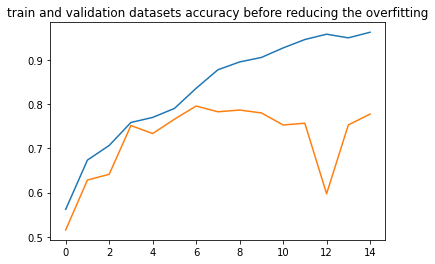

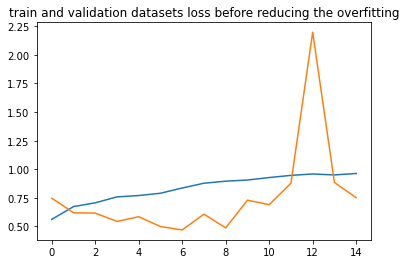

In [16]:
# Retrieve a list of accuracy results on training and validation data
# sets for each test epoch
train_overfitting_acc = record.history['acc']
val_acc = record.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each train epoch
train_overfitting_loss = record.history['loss']
val_loss = record.history['val_loss']

# Get number of epochs
epochs = range(len(train_overfitting_acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, train_overfitting_acc)
plt.plot(epochs, val_acc)
plt.title('train and validation datasets accuracy before reducing the overfitting')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, train_overfitting_acc)
plt.plot(epochs, val_loss)
plt.title('train and validation datasets loss before reducing the overfitting')

## Reducing Overfitting

Improve model accuracy by reducing overfitting using **data augmentation** and **dropout**. 

## Exploring Data Augmentation

The training examples will be "augmented" via a number of random transformations, so that at training time, **model will never see the exact same picture twice**. This helps prevent overfitting and helps the model generalize better.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

genData = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Apply the `genData` transformations to a dog image from the training set to produce five random variants.

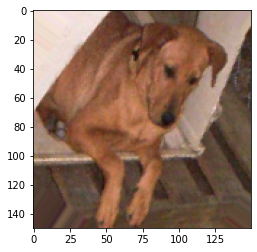

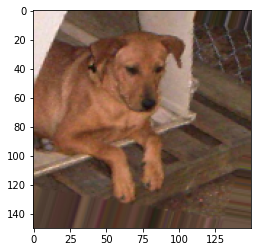

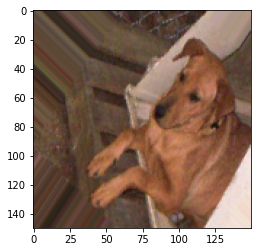

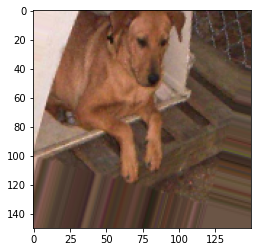

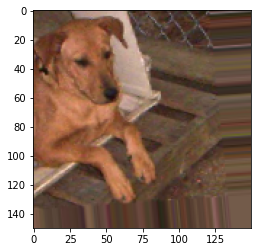

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

toNextDog = [os.path.join(dogs_train, picsFile) 
              for picsFile in dog_train_file[pic_index-10:pic_index]]

img_path = os.path.join(dogs_train, dog_train_file[2])
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images
i = 0
for batch in genData.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

## Add Data Augmentation to the Preprocessing Step

In [19]:
# Add rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Validation data should not be augmented
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_direct,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validate_direct,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1076 images belonging to 2 classes.
Found 772 images belonging to 2 classes.


## Add Dropout

In [20]:
# Create input map for the image's pixels based on the 3 color channels of R, G, B)
img_input = layers.Input(shape=(150,150,3))

# 1st Set extracts 16 filters with a kernel size of 3 (3x3). Activation set at 'relu' so any neg or 0 output transforms to 0.
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# 2nd set extracts 32 filters with a kernel size of 3 (3x3). Activation set at 'relu' so any neg or 0 output transforms to 0.
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# 3rd set extracts 64 filters with a kernel size of 3 (3x3). Activation set at 'relu' so any neg or 0 output transforms to 0.
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten map to add connecting layers
x = layers.Flatten()(x)

# Create a layer of ReLU activation with hidden units of 512
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node layer this time with sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

#Create the model:
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        1849

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Retrain the Model

In [21]:
record = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=35,
      verbose=2)

Epoch 1/20
50/50 - 43s - loss: 0.9455 - acc: 0.5653 - val_loss: 0.6365 - val_acc: 0.7129 - 43s/epoch - 856ms/step
Epoch 2/20
50/50 - 37s - loss: 0.6768 - acc: 0.6195 - val_loss: 0.5677 - val_acc: 0.7443 - 37s/epoch - 745ms/step
Epoch 3/20
50/50 - 39s - loss: 0.6086 - acc: 0.6988 - val_loss: 0.5087 - val_acc: 0.7843 - 39s/epoch - 778ms/step
Epoch 4/20
50/50 - 38s - loss: 0.5657 - acc: 0.7309 - val_loss: 0.5368 - val_acc: 0.7343 - 38s/epoch - 760ms/step
Epoch 5/20
50/50 - 37s - loss: 0.5461 - acc: 0.7349 - val_loss: 0.5711 - val_acc: 0.7414 - 37s/epoch - 739ms/step
Epoch 6/20
50/50 - 37s - loss: 0.5297 - acc: 0.7661 - val_loss: 0.5328 - val_acc: 0.7429 - 37s/epoch - 742ms/step
Epoch 7/20
50/50 - 38s - loss: 0.5445 - acc: 0.7500 - val_loss: 0.5334 - val_acc: 0.7500 - 38s/epoch - 752ms/step
Epoch 8/20
50/50 - 39s - loss: 0.5771 - acc: 0.7721 - val_loss: 0.5145 - val_acc: 0.7714 - 39s/epoch - 780ms/step
Epoch 9/20
50/50 - 45s - loss: 0.4764 - acc: 0.7841 - val_loss: 0.7433 - val_acc: 0.7171

##**Validate and Evalute the Model**

**Evaluate the result after reducing the overfitting training/validation data** 

Text(0.5, 1.0, 'train and validation datasets loss')

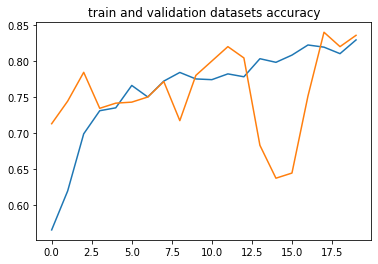

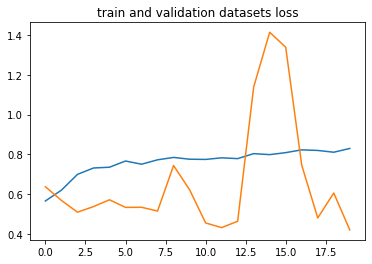

In [22]:
# Retrieve a list of accuracy results on training and validation data
# sets for each test epoch
train_acc = record.history['acc']
val_acc = record.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each train epoch
train_loss = record.history['loss']
val_loss = record.history['val_loss']

# Get number of epochs
epochs = range(len(train_acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, train_acc)
plt.plot(epochs, val_acc)
plt.title('train and validation datasets accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, train_acc)
plt.plot(epochs, val_loss)
plt.title('train and validation datasets loss')

**Load the test dataSets**

In [23]:
test_direct = os.path.join(home_directory, 'test')

# Subset with dog pics for evaluation and validation
dogs_test = os.path.join(test_direct, 'dogTest')

# Subset with coyote pics for  evaluation and validation
coyotes_test = os.path.join(test_direct, 'coyotesTest')

**Print how many test pictures**

In [24]:
print('Total dog validation pics: = ', len(os.listdir(dogs_test)))
print('Total coyote validation pics: = ', len(os.listdir(coyotes_test)))

Total dog validation pics: =  30
Total coyote validation pics: =  30


**Processing the test data**

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_direct,  
        target_size=(150, 150),  
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 60 images belonging to 2 classes.


**Fitting the test data in the model**

In [26]:
test_record = model.fit(
      test_generator,
      steps_per_epoch=2,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=35,
      verbose=2)


Epoch 1/25
2/2 - 13s - loss: 0.3722 - acc: 0.8750 - val_loss: 0.4222 - val_acc: 0.8200 - 13s/epoch - 7s/step
Epoch 2/25
2/2 - 8s - loss: 0.3260 - acc: 0.8750 - val_loss: 0.4188 - val_acc: 0.8057 - 8s/epoch - 4s/step
Epoch 3/25
2/2 - 8s - loss: 0.4149 - acc: 0.9250 - val_loss: 0.4203 - val_acc: 0.8129 - 8s/epoch - 4s/step
Epoch 4/25
2/2 - 8s - loss: 0.2717 - acc: 0.9500 - val_loss: 0.4316 - val_acc: 0.8171 - 8s/epoch - 4s/step
Epoch 5/25
2/2 - 8s - loss: 0.2695 - acc: 0.9250 - val_loss: 0.4478 - val_acc: 0.8057 - 8s/epoch - 4s/step
Epoch 6/25
2/2 - 8s - loss: 0.2551 - acc: 0.9000 - val_loss: 0.4703 - val_acc: 0.7857 - 8s/epoch - 4s/step
Epoch 7/25
2/2 - 8s - loss: 0.1647 - acc: 0.9750 - val_loss: 0.4587 - val_acc: 0.8129 - 8s/epoch - 4s/step
Epoch 8/25
2/2 - 8s - loss: 0.2138 - acc: 0.9250 - val_loss: 0.4404 - val_acc: 0.8243 - 8s/epoch - 4s/step
Epoch 9/25
2/2 - 8s - loss: 0.0987 - acc: 0.9750 - val_loss: 0.4587 - val_acc: 0.8214 - 8s/epoch - 4s/step
Epoch 10/25
2/2 - 8s - loss: 0.2269

**Evaluate the result of the fitting** 

Text(0.5, 1.0, 'Test and validation datasets loss')

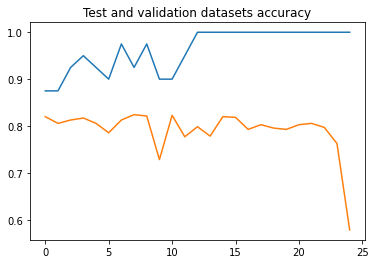

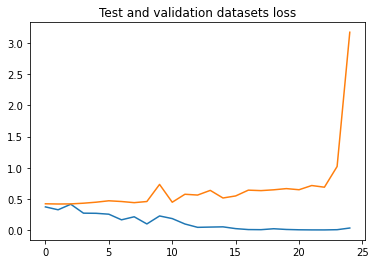

In [27]:
# Retrieve a list of accuracy results on test and validation data
# sets for each test epoch
test_acc = test_record.history['acc']
val_acc = test_record.history['val_acc']

# Retrieve a list of list results on test and validation data
# sets for each test epoch
test_loss = test_record.history['loss']
val_loss = test_record.history['val_loss']

# Get number of epochs
epochs = range(len(test_acc))

# Plot test and validation accuracy per epoch
plt.plot(epochs, test_acc)
plt.plot(epochs, val_acc)
plt.title('Test and validation datasets accuracy')

plt.figure()

# Plot test and validation loss per epoch
plt.plot(epochs, test_loss)
plt.plot(epochs, val_loss)
plt.title('Test and validation datasets loss')